<a href="https://colab.research.google.com/github/phycoding/InternTSP_DS/blob/main/Unsupervised_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


In [6]:
import io
data = pd.read_csv(io.BytesIO(uploaded["Iris.csv"]))

In [13]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
dataset = data.iloc[:,[0,1,2,3,4]]

In [8]:
from sklearn.cluster import KMeans

Using Elbow method to find the no of optimum clusters in it.

In [20]:
wss = []
for i in range(1,11):
  km = KMeans(n_clusters=i,n_init=10,random_state=0)
  km.fit(dataset)
  wss.append(km.inertia_)

Text(0.5, 1.0, 'The Elbow Method')

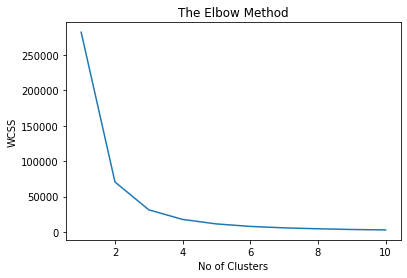

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wss)
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.title("The Elbow Method")

From the above plotting we conclude that No of clusters should be 3

In [46]:
k_m = KMeans(n_clusters=3)
k_m.fit(dataset)
y_predict = k_m.fit_predict(dataset)

In [49]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

As it is a five dimensional data here it is taken column 1 and column 3 to scatter data and cluster centre

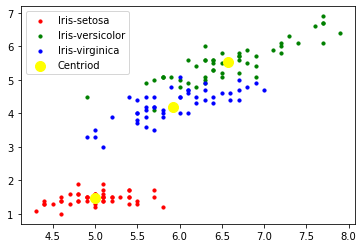

In [66]:
plt.scatter(dataset[y_predict==0]['SepalLengthCm'],dataset[y_predict==0]["PetalLengthCm"]
            ,c='red',s = 10,label="Iris-setosa")
plt.scatter(dataset[y_predict==1]['SepalLengthCm'],dataset[y_predict==1]["PetalLengthCm"]
            ,c='green',s=10,label="Iris-versicolor")
plt.scatter(dataset[y_predict==2]['SepalLengthCm'],dataset[y_predict==2]["PetalLengthCm"]
            ,c='blue',s=10,label="Iris-virginica")
plt.scatter(k_m.cluster_centers_[:,1],k_m.cluster_centers_[:,3],s=100,c="yellow",label= "Centriod")
plt.legend()
